In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from cv2 import cv2
import matplotlib.pyplot as plt
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q keras

In [ ]:
import keras

In [ ]:
val_path= "/content/drive/My Drive/dataset/validation"
train_path= "/content/drive/My Drive/dataset/train"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)

Found 3591 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [ ]:
class_names = train_dataset.class_names
print(len(class_names))

36


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(class_names),activation='softmax'))

In [ ]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x=train_dataset,
                    epochs= 20,
                    validation_data=val_dataset)

Epoch 1/20
113/113 [==============================] - 763s 6s/step - loss: 3.1623 - accuracy: 0.1649 - val_loss: 2.8668 - val_accuracy: 0.2422
Epoch 2/20
113/113 [==============================] - 353s 3s/step - loss: 2.3639 - accuracy: 0.3255 - val_loss: 1.8171 - val_accuracy: 0.4245
Epoch 3/20
113/113 [==============================] - 353s 3s/step - loss: 2.0246 - accuracy: 0.4222 - val_loss: 1.3361 - val_accuracy: 0.5869
Epoch 4/20
113/113 [==============================] - 354s 3s/step - loss: 1.7954 - accuracy: 0.4642 - val_loss: 1.0052 - val_accuracy: 0.6695
Epoch 5/20
113/113 [==============================] - 354s 3s/step - loss: 1.5870 - accuracy: 0.5249 - val_loss: 1.0299 - val_accuracy: 0.6781
Epoch 6/20
113/113 [==============================] - 353s 3s/step - loss: 1.3806 - accuracy: 0.5851 - val_loss: 1.0394 - val_accuracy: 0.6524
Epoch 7/20
113/113 [==============================] - 355s 3s/step - loss: 1.2213 - accuracy: 0.6397 - val_loss: 0.7521 - val_accuracy: 0.7977

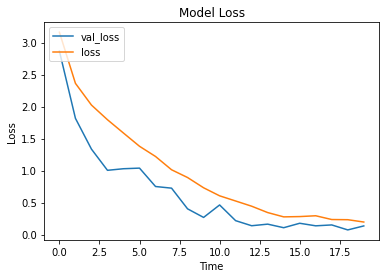

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

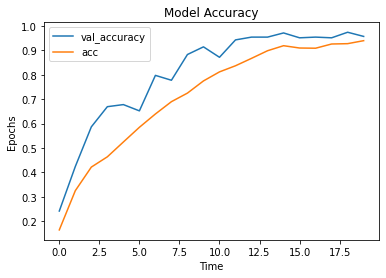

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

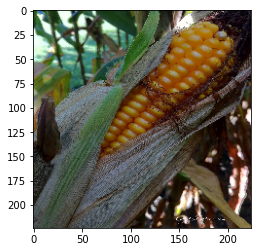

Actual: corn
Predicted: corn


In [ ]:
from keras_preprocessing import image
image_path="/content/drive/My Drive/dataset/test/corn/Image_10.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

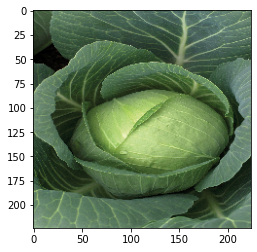

Actual: cabbage
Predicted: cabbage


In [ ]:
from keras_preprocessing import image
image_path="/content/drive/My Drive/dataset/test/cabbage/Image_7.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])


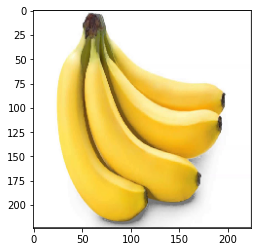

Actual: banana
Predicted: banana


In [ ]:
from keras_preprocessing import image
image_path="/content/drive/My Drive/dataset/test/banana/Image_5.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

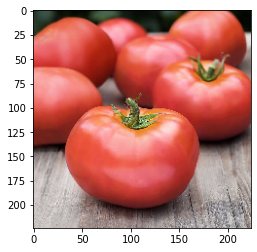

Actual: tomato
Predicted: tomato


In [ ]:
from keras_preprocessing import image
image_path="/content/drive/My Drive/dataset/test/tomato/Image_2.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])